## Grafico Parallel Coordidantes

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display, HTML



def decada(data):
    if(data[:2] == '19' or data[:2] == '20'):
        return data[:3] + '0s'
    return data
    
    
def region(lat, lng):
    if lat > -27.6307621:
        return 0  # "Norte Grande"
    if lat > -32.759362:
        return 1  # "Norte Chico"
    if lat > -38.0613847:
        return 2  # "Central"
    if lat > -43.7890687:
        return 3  # "Sur"
    if lat > -56:
        return 4  # "Austral"
    else:
        return 5  # "Antartica"


def str_region(n):
    if n == 0:
        return "Norte Grande"
    if n == 1:
        return "Norte Chico"
    if n == 2:
        return "Central"
    if n == 3:
        return "Sur"
    if n == 4:
        return "Austral"
    else:
        return "Antartica"
    

#Transformar los año-mes en año
def año(data):
    if(data[:2] == '19' or data[:2] == '20'):
        return data[:4]
    return data     

#Recibe un nombre de archivo y lo carga como un df 
#asignandole la zona correspondiente y agrupandolo por años
def dfProcesar(carpeta, nombre):

    #dargar dato    
    directory = os.path.dirname(os.getcwd())
    data_path = os.path.join(directory, "data")
    file_path = os.path.join(data_path, carpeta + "/" + nombre + ".txt") #cr2_tasAmon_2018_ghcn.txt

    raw = pd.read_table(file_path, sep=",", index_col=0, na_values=[-9999, "-"],
                        low_memory=False)
    table = raw.transpose()
    groups = table.columns.to_series().groupby(table.dtypes).groups

    table[table.columns.values[14:]] = table[table.columns.values[14:]].apply(pd.to_numeric)
    table[['codigo_estacion', 'latitud', 'longitud', 'codigo_cuenca', 'codigo_sub_cuenca', 'cantidad_observaciones']] = table[
        ['altura', 'latitud', 'longitud', 'codigo_cuenca', 'codigo_sub_cuenca', 'cantidad_observaciones']].apply(
        pd.to_numeric)
    table[['inicio_observaciones', 'fin_observaciones', 'inicio_automatica']] = \
        table[['inicio_observaciones', 'fin_observaciones', 'inicio_automatica']].apply(pd.to_datetime)

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)



    zona = table[['latitud', 'longitud']].apply(lambda x: region(x['latitud'], x['longitud']), axis=1)

    table['zona'] = zona


    #Agrupar por años
    #lista de años
    listaAnhos = range(1900, 2018)
    listaAnhos = list(map(lambda x : str(x), listaAnhos))
    listaColumnas = ['institucion', 'zona', 'fuente', 'nombre', 'altura', 
                    'latitud' , 'longitud']

    #obtener nombres de las columnas
    columnHeaders = list(table)

    columnYears = list(map(lambda x : año(x), columnHeaders))

    #asignar nuevas columnas
    table3 = table
    table3.columns = columnYears
    table3 = table3.sort_values('latitud', ascending=False) #De norte a sur

    #agrupar por año
    auxgb = table3[listaAnhos].groupby(level=0, axis=1).mean()
    
    table4 = table3[listaColumnas]
    for anho in listaAnhos:
        table4[anho] = auxgb[anho] 
    table4['2018'] = table3['2018']    
    return table4

tasAmon = dfProcesar("cr2_tasAmon_2018_ghcn", "cr2_tasAmon_2018_ghcn")
prAmon = dfProcesar("cr2_prAmon_2018_ghcn", "cr2_prAmon_2018_ghcn")

#display(prAmon)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [2]:
display(tasAmon.interpolate())

,institucion,zona,fuente,nombre,altura,latitud,longitud,1900,1901,1902,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
COM00080002,GHCN,0,ghcn_ftp,El Embrujo,3,13.3570,-81.358,NaN,NaN,NaN,...,28.447200,28.534500,28.196300,28.229333,28.373917,28.292000,28.516917,28.627833,28.382083,27.024000
CO000080001,GHCN,0,ghcn_ftp,San Andres (Isla)/S,6,12.5830,-81.717,NaN,NaN,NaN,...,27.810333,27.892500,27.594917,27.678083,27.907417,27.872417,28.097917,28.248250,28.180917,26.977000
VE000080405,GHCN,0,ghcn_ftp,La Orchila,3,11.8000,-66.183,NaN,NaN,NaN,...,28.872310,28.381958,28.109375,28.529167,28.832667,28.951708,29.352750,29.108375,28.873000,28.260000
COM00080035,GHCN,0,ghcn_ftp,Almirante Padilla,13,11.5260,-72.926,NaN,NaN,NaN,...,29.934286,28.871417,28.623833,29.380250,29.757917,30.031000,30.607583,29.968500,29.565083,29.543000
VEM00080403,GHCN,0,ghcn_ftp,Jose Leonardo Chirinos,16,11.4150,-69.681,NaN,NaN,NaN,...,29.447000,29.874583,29.632333,29.972250,29.895500,29.704083,31.370500,30.316111,28.626000,29.365000
COM00080009,GHCN,0,ghcn_ftp,Simon Bolivar,7,11.1200,-74.231,NaN,NaN,NaN,...,29.543714,28.849917,28.786333,29.354500,29.278833,29.586333,30.029417,29.671333,29.318500,29.187000
VEM00080421,GHCN,0,ghcn_ftp,Porlamar (Aeropuerto Int. Del,19,10.9170,-63.967,NaN,NaN,NaN,...,28.709857,28.436125,28.159500,28.093500,28.382000,28.848000,29.213292,28.931917,28.591250,28.493500
COM00080028,GHCN,0,ghcn_ftp,Ernesto Cortissoz,30,10.8900,-74.781,NaN,NaN,NaN,...,27.876000,28.022333,27.532667,27.988250,27.987667,28.109667,28.397167,28.192500,27.864000,27.800000
VEM00080415,GHCN,0,ghcn_ftp,Simon Bolivar Intl,72,10.6030,-66.991,NaN,NaN,NaN,...,28.222083,28.108333,26.922583,27.470167,27.162750,27.008250,27.483750,27.644091,28.251909,26.077000
VE000080423,GHCN,0,ghcn_ftp,Guiria,14,10.5830,-62.317,NaN,NaN,NaN,...,27.807417,28.147583,27.755250,28.101917,27.931250,27.685667,28.331667,27.997800,29.325955,26.346714


In [110]:
from pandas.plotting import parallel_coordinates
  
test1tas = tasAmon[['zona', 'longitud']]
test1tas['altura']=tasAmon['altura'].astype('int64')
test1tas['temp 2018'] = tasAmon['2018']
test1tas['prep 2018'] = prAmon['2018']
test1tas['prep 2018'] = prAmon['2018']
#parallel_coordinates(test1tas,'zona',color=['r','g', 'b'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [111]:
#!/usr/bin/python
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def colorList(dfMatrix):
    colorList = []
    colorDict = {0:'r', 1:'y', 2:'g', 3:'c', 4:'b', 5:'m'}
    for data in dfMatrix:
        #display(data)
        #print("zone: " + str(int(data[0])) + " dict: " + colorDict[int(data[0])])
        colorList.append(colorDict[int(data[0])])
    return colorList

def parallel_coordinates(data_sets):
    
    #column names
    dimNames = list(data_sets)
    
    #iterpolate and trasnform panda dataset to matrix
    data_sets = data_sets.interpolate().as_matrix()
    
    #fig config
    style = colorList(data_sets)
    dims = len(data_sets[0])
    x    = range(dims)
    fig, axes = plt.subplots(1, dims-1, sharey=False)
    fig.set_size_inches(18.5, 10.5)

    # Calculate the limits on the data
    min_max_range = list()
    for m in zip(*data_sets):
        mn = min(m)
        mx = max(m)
        print(mn)
        print(mx)
        if mn == mx:
            mn -= 0.5
            mx = mn + 1.
        r  = float(mx - mn)
        min_max_range.append((mn, mx, r))

    # Normalize the data sets
    norm_data_sets = list()
    for ds in data_sets:
        nds = [(value - min_max_range[dimension][0]) / min_max_range[dimension][2] 
                for dimension,value in enumerate(ds)] 
        norm_data_sets.append(nds)
    data_sets = norm_data_sets

    # Plot the datasets on all the subplots
    for i, ax in enumerate(axes):
        for dsi, d in enumerate(data_sets):
            #print(dsi)
            #print(d)
            ax.plot(x, d, style[dsi])
        ax.set_xlim([x[i], x[i+1]])

    # Set the x axis ticks 

    for dimension, (axx,xx) in enumerate(zip(axes, x[:-1])):
        axx.xaxis.set_major_locator(ticker.FixedLocator([xx]))
        ticks = len(axx.get_yticklabels())
        labels = list()
        step = min_max_range[dimension][2] / (ticks - 1)
        mn   = min_max_range[dimension][0]
        for i in range(ticks):
            v = mn + i*step
            if dimNames[dimension] == 'zona':
                labels.append(str_region(i-1))
            else:
                labels.append('%4.2f' % v)
        axx.set_yticklabels(labels)
        axx.set_xticklabels([str(dimNames[dimension])])




    # Move the final axis' ticks to the right-hand side
    axx = plt.twinx(axes[-1])
    dimension += 1
    axx.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
    ticks = len(axx.get_yticklabels())
    step = min_max_range[dimension][2] / (ticks - 1)
    mn   = min_max_range[dimension][0]
    labels = ['%4.2f' % (mn + i*step) for i in range(ticks)]
    axx.set_yticklabels(labels)
    axx.set_xticklabels([str(dimNames[dimension-1]),str(dimNames[dimension])])
    
    # Stack the subplots 
    plt.subplots_adjust(wspace=0)
    

    
    return plt


# if __name__ == '__main__':
#     import random
#     base  = [0,   0,  5,   5,  0]
#     scale = [1.5, 2., 1.0, 2., 2.]
#     data = [[base[x] + random.uniform(0., 1.)*scale[x]
#             for x in range(5)] for y in range(30)]
#     colors = ['r'] * 30

#     base  = [3,   6,  0,   1,  3]
#     scale = [1.5, 2., 2.5, 2., 2.]
#     data.extend([[base[x] + random.uniform(0., 1.)*scale[x]
#                  for x in range(5)] for y in range(30)])
#     colors.extend(['b'] * 30)

#     display(data)
#     parallel_coordinates(data, style=colors).show()

0.0
5.0
-178.6
174.167
-1000.0
4585.0
-36.853
33.973
0.0
1037.65


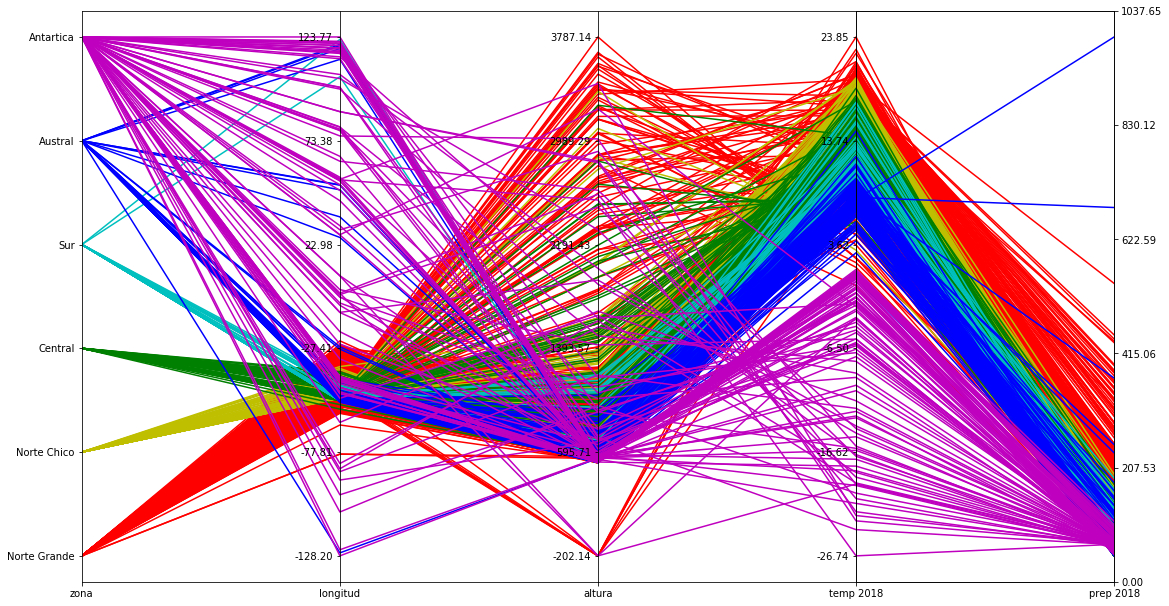

In [112]:
#panda to python list
# def dfToList(df):
#     dflist = []
#     #obtener nombres de las columnas
#     columnHeaders = list(df)
#     for name in columnHeaders:
#          dflist.append(df[name].tolist())
#     return dflist


#display(dfToList(test1tas.interpolate()))

#testdf = dfToList(test1tas.interpolate().sample(60))
#display(test1tas.interpolate().sample(60).as_matrix())
testdf = test1tas.as_matrix()#.interpolate().as_matrix()
#display(testdf[0][0])
parallel_coordinates(test1tas).show()

    


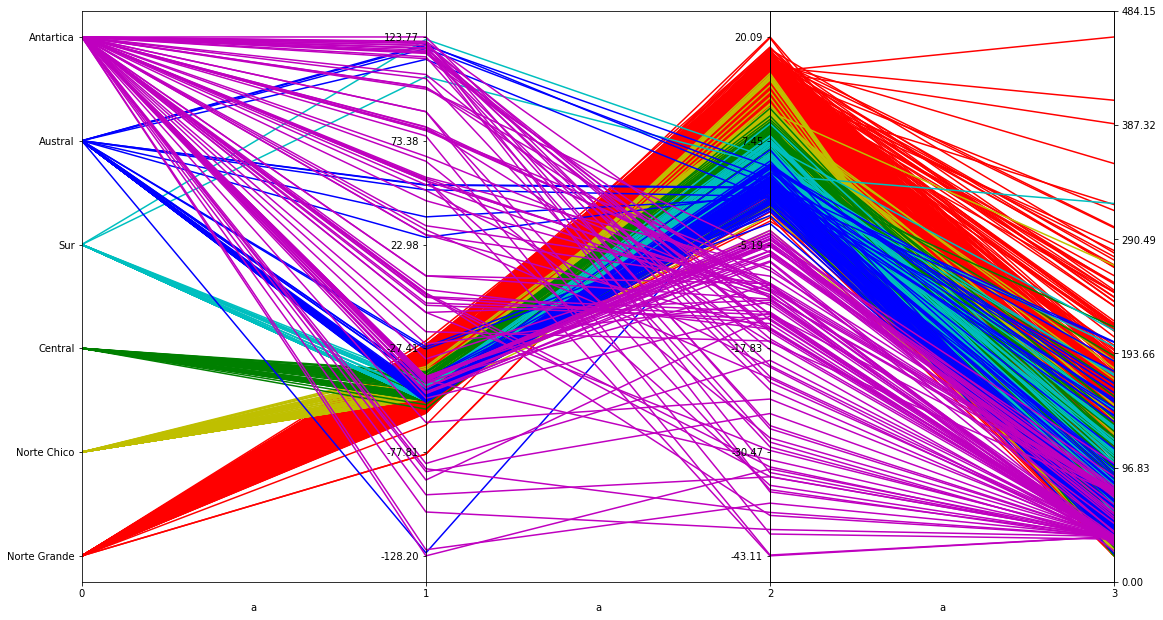

In [54]:
testdf = test1tas.interpolate().as_matrix()
parallel_coordinates(testdf, style=colorList(testdf)).show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0
[0.0, 0.2756550357601476, 0.9536637606245103, 0.2057902165306895]
1
[0.0, 0.27463736687388557, 0.949373455301706, 0.2348273606664601]
2
[0.0, 0.31867209801370305, 0.959095164717584, 0.19858687046025678]
3
[0.0, 0.2995574982920738, 0.968816874133462, 0.16234638025405349]
4
[0.0, 0.3087562045202641, 0.9727458079651174, 0.0982133636269751]
5
[0.0, 0.2958581726748817, 0.9654580972331063, 0.034080346999896725]
6
[0.0, 0.32495386473224536, 0.9571007143287722, 0.054683465868016104]
7
[0.0, 0.29429906992434096, 0.9487433314244379, 0.07528658473613548]
8
[0.0, 0.3163816343365451, 0.9425448442012506, 0.10771455127543116]
9
[0.0, 0.3296311729838675, 0.9465427014889385, 0.1401425178147268]
10
[0.0, 0.30295350755597883, 0.9690711842184582, 0.17257048435402253]
11
[0.0, 0.30317461667332823, 0.8070926140816204, 0.20499845089331817]
12
[0.0, 0.3167983399807805, 0.6451140439447827, 0.2374264174326139]
13
[0.0, 0.3133144540163904, 0.7965503621877952, 0.26985438397190953]
14
[0.0, 0.3244918033716306, 0

188
[0.0, 0.3100375035079812, 0.9422292256917236, 0.31363099131352773]
189
[0.0, 0.33592144389923095, 0.9285143769968051, 0.45261454783297184]
190
[0.0, 0.3970978010981753, 0.9342815645909941, 0.44756101759096695]
191
[0.0, 0.32296955214064804, 0.940048752185183, 0.44250748734896206]
192
[0.0, 0.2959347104462719, 0.8491696304780275, 0.12260072881781031]
193
[0.0, 0.38320761295699424, 0.9762945325215505, 0.5837033977073222]
194
[0.0, 0.3228760059756156, 0.9471392941105553, 0.2629350407931426]
195
[0.0, 0.32452865489118876, 0.9428838386882875, 0.27601638610623425]
196
[0.0, 0.302355379046226, 0.7735867894387848, 0.172441392130538]
197
[0.0, 0.2902198901824717, 0.8588918108385074, 0.24533977073221105]
198
[0.0, 0.3207924777544385, 0.9388026327687022, 0.31823814933388406]
199
[0.0, 0.31697125864947684, 0.9391699695581409, 0.22968088402354642]
200
[0.0, 0.3748451527495486, 0.9366406830831676, 0.23659530940332343]
201
[0.0, 0.38179024682013907, 0.9341113966081942, 0.24350973478310048]
202
[0

356
[0.0, 0.38369802164034617, 0.9021151063958045, 0.17881854797067026]
357
[0.0, 0.30977415687975346, 0.8501331831334016, 0.0]
358
[0.0, 0.3129535925979471, 0.858102193722748, 0.0]
359
[0.0, 0.3839162960254219, 0.8660712043120943, 0.05736342042755344]
360
[0.0, 0.37267374782788637, 0.8740402149014407, 0.11472684085510688]
361
[0.0, 0.37711293856851685, 0.8811006163722949, 0.1720902612826603]
362
[0.0, 0.367616585451587, 0.8760346652902525, 0.22945368171021377]
363
[0.0, 0.3239276916491622, 0.8709687142082103, 0.28681710213776723]
364
[0.0, 0.31352762588337346, 0.869087290523841, 0.21525052497504218]
365
[0.0, 0.37631070933505684, 0.867205866839472, 0.14368394781231714]
366
[0.0, 0.36133481873304474, 0.8813709385737537, 0.07211737064959207]
367
[0.0, 0.30830633250842626, 0.8286939010790283, 0.0005507934868670178]
368
[0.0, 0.36119308211935924, 0.8588023313641571, 0.16626586604899107]
369
[0.0, 0.34352136112504855, 0.8889107616492857, 0.33198093861111516]
370
[0.0, 0.3065762954017808, 0

497
[0.2, 0.3051181091201841, 0.8057899813129182, 0.00030982133636269746]
498
[0.2, 0.3123364713819603, 0.8353615347519441, 0.0026851182484767117]
499
[0.2, 0.3044763257334161, 0.8299169442100187, 0.03363282729181727]
500
[0.2, 0.325191982243237, 0.8244723536680933, 0.2636579572446556]
501
[0.2, 0.34758636720554925, 0.8291634328470674, 0.2652128013586239]
502
[0.2, 0.3348300719738524, 0.8338545120260414, 0.26676764547259224]
503
[0.2, 0.30595095346220025, 0.8335549912592681, 0.04991565974732349]
504
[0.2, 0.30463138558878805, 0.8332554704924949, 0.05146476642913697]
505
[0.2, 0.32161171538154076, 0.8329559497257218, 0.1966590932562222]
506
[0.2, 0.3069408419721799, 0.6561897190909639, 0.1418653122154103]
507
[0.2, 0.35864182307301984, 0.6952771791548616, 0.08707153117459838]
508
[0.2, 0.30413133881570553, 0.7343646392187594, 0.03227775013378648]
509
[0.2, 0.3417751660444429, 0.7734520992826572, 0.04014533437233014]
510
[0.2, 0.3057179384693013, 0.812539559346555, 0.04801291861087379]
5

649
[0.4, 0.3027006494371639, 0.779719430044005, 0.14645943061723293]
650
[0.4, 0.30037616897272135, 0.8006455708602085, 0.12558091500568003]
651
[0.4, 0.3030359982651438, 0.7811755907529085, 0.28052600777995795]
652
[0.4, 0.30033988439961784, 0.7784921484115981, 0.33292884436641534]
653
[0.4, 0.3033274087428812, 0.7758087060702875, 0.3853316809528727]
654
[0.4, 0.3430507955676126, 0.7885392805473506, 0.19004253001980978]
655
[0.4, 0.30097599832183847, 0.7780579374886972, 0.17583299691117515]
656
[0.4, 0.2986957396808658, 0.767576594430044, 0.16162346380254053]
657
[0.4, 0.30378578495154024, 0.7570952513713907, 0.2299562807669799]
658
[0.6, 0.3040258867751235, 0.8325349252516727, 0.2169919790698475]
659
[0.6, 0.304169891174628, 0.7581997734442502, 0.20402767737271504]
660
[0.6, 0.3352637860117301, 0.7671756635923404, 0.1785999518055699]
661
[0.6, 0.3039564358344176, 0.7761515537404304, 0.15317222623842472]
662
[0.6, 0.3030351478454617, 0.7712207637591175, 0.19975730661984922]
663
[0.6,

803
[1.0, 0.3391275261007974, 0.6269770254385436, 0.08940066783710283]
804
[1.0, 0.34007432668021664, 0.6221036906986557, 0.044975730661984924]
805
[1.0, 0.33715115075956653, 0.6160139060522033, 0.08959000309821336]
806
[1.0, 0.33709785779282075, 0.6161330550364699, 0.07459809287755172]
807
[1.0, 0.345602054613952, 0.5879997664114774, 0.0801404523391511]
808
[1.0, 0.34215388627621063, 0.6008160528060763, 0.0991600399325278]
809
[1.0, 0.34475163493183886, 0.6010336292121286, 0.07024338187200936]
810
[1.0, 0.3455056737166458, 0.5682398728072818, 0.0474543013528865]
811
[1.0, 0.32462503578849494, 0.6092026342757249, 0.1299012014182932]
812
[1.0, 0.3246703915048743, 0.6036549068659955, 0.12902797076413206]
813
[1.0, 0.3241034450501322, 0.5981071794562661, 0.1281547401099709]
814
[1.0, 0.8267978580762941, 0.5155119732955573, 0.12728150945580977]
815
[1.0, 0.8202779738467602, 0.549772251190548, 0.1264082788016486]
816
[1.0, 0.8195692907783325, 0.5255336744228103, 0.12553504814748745]
817
[1.

82
[0.0, 0.25224298191157335, 0.9200816429561757, 0.43313022823505104]
83
[0.0, 0.32792182942282017, 0.9279846585086503, 0.3092791490240628]
84
[0.0, 0.27822897266467667, 0.9358876740611249, 0.18542806981307447]
85
[0.0, 0.3713045721396842, 0.9332660196515763, 0.3731023443147784]
86
[0.0, 0.281015514489734, 0.9306443652420278, 0.5607766188164824]
87
[0.0, 0.3688667023842933, 0.933514866779191, 0.3767943819064339]
88
[0.0, 0.36889221497475666, 0.910325790056664, 0.5268640917071156]
89
[0.0, 0.2854575399626382, 0.8871367133341371, 0.6769338015077971]
90
[0.0, 0.3775863388582265, 0.8981343058653324, 0.600471401769424]
91
[0.0, 0.3582166132319633, 0.9091318983965279, 0.5240090020310509]
92
[0.0, 0.35297235852559905, 0.9201294909277231, 0.44754660229267784]
93
[0.0, 0.36596393653601383, 0.9311270834589186, 0.37108420255430474]
94
[0.0, 0.35117513826406666, 0.942124675990114, 0.29462180281593164]
95
[0.0, 0.380704544359308, 0.8885847110032753, 0.21815940307755857]
96
[0.0, 0.3187174537300824

290
[0.0, 0.37593368994265336, 0.8842546893523822, 0.003090563454087155]
291
[0.0, 0.3260877576417295, 0.8885104587377177, 0.004528746447573256]
292
[0.0, 0.3112323431613501, 0.8844917942612575, 0.005966929441059359]
293
[0.0, 0.30992042906507694, 0.8804731297847972, 0.0]
294
[0.0, 0.30856145841306015, 0.8764544653083368, 0.00045899457238918147]
295
[0.0, 0.34139531191976574, 0.8724358008318766, 0.0004016202508405337]
296
[0.0, 0.3110095332046365, 0.8684171363554162, 0.0003442459292918861]
297
[0.0, 0.39194992728911715, 0.8643984718789559, 0.00028687160774323845]
298
[0.0, 0.3645947608478117, 0.8603798074024958, 0.00022949728619459073]
299
[0.0, 0.3514586114914377, 0.8563611429260354, 0.00017212296464594302]
300
[0.0, 0.3096054903094677, 0.8523424784495751, 0.00011474864309729537]
301
[0.0, 0.30733883838340886, 0.8483238139731147, 5.737432154864771e-05]
302
[0.0, 0.30734564174086576, 0.8459135195008742, 0.0]
303
[0.0, 0.3718233281457733, 0.8270952011373, 0.0011015869737340356]
304
[0.0

459
[0.2, 0.3075843261983122, 0.9215010699861353, 0.021584219766601256]
460
[0.2, 0.3062596558068073, 0.925793259087347, 0.009595072901899298]
461
[0.2, 0.30628573534372544, 0.9300854481885588, 0.0014458329030259216]
462
[0.2, 0.30524793985832005, 0.9183719794958795, 0.005507934868670177]
463
[0.2, 0.30542652799156383, 0.9066585108032001, 0.011560925792052508]
464
[0.2, 0.3042824300458943, 0.8949450421105208, 0.01761391671543484]
465
[0.2, 0.3064858674422494, 0.8832315734178415, 0.02366690763881717]
466
[0.2, 0.3077322992229999, 0.8715181047251622, 0.041309511515026334]
467
[0.2, 0.3113953402670885, 0.8598046360324828, 0.2015559916003993]
468
[0.2, 0.342860868505274, 0.8480911673398035, 0.3618024716857723]
469
[0.2, 0.3430507955676126, 0.8485432741575744, 0.1873042101277152]
470
[0.2, 0.3058786677892206, 0.8489953809753451, 0.012805948569658164]
471
[0.2, 0.30566918107419344, 0.849447487793116, 0.07177527625735824]
472
[0.2, 0.31838862478633206, 0.8498995946108868, 0.13074460394505832]

626
[0.4, 0.3331745883260055, 0.7816253428476702, 0.09910409996901787]
627
[0.4, 0.30346347589201933, 0.7747471969377299, 0.11927260835140624]
628
[0.4, 0.30524935722445695, 0.7859194157272891, 0.13989293951599022]
629
[0.4, 0.34262558572655605, 0.7970916345168486, 0.1605132706805742]
630
[0.4, 0.3241062797824059, 0.8050496563988185, 0.24523096442955988]
631
[0.4, 0.3020945836770446, 0.7876265899089758, 0.1663347152348495]
632
[0.4, 0.3020690710865812, 0.7805275709807704, 0.08743846604013907]
633
[0.4, 0.3027525250377728, 0.7815999118391705, 0.14751626562015907]
634
[0.4, 0.30389747340312445, 0.7826722526975707, 0.22823505112052048]
635
[0.4, 0.3040879674119178, 0.7837445935559708, 0.1874992828209806]
636
[0.4, 0.2991691399705755, 0.7848169344143708, 0.14676351452144076]
637
[0.4, 0.29917140775639445, 0.7809533049008379, 0.10602774622190092]
638
[0.4, 0.3365309113380786, 0.7919329073482428, 0.14531768161841485]
639
[0.4, 0.3031958771653811, 0.7684322065826753, 0.21594547144480014]
640


786
[0.8, 0.39842162106999807, 0.6405468231960938, 0.07423147096285586]
787
[0.8, 0.31125445407308505, 0.69685201790343, 0.0590450617921443]
788
[0.8, 0.4028154560942492, 0.655625527457954, 0.06732934008055354]
789
[0.8, 0.3111850031323791, 0.6643455377057086, 0.07561361836896278]
790
[0.8, 0.9568270274713906, 0.6884239933088191, 0.06629315983338496]
791
[0.8, 0.312682308719353, 0.7032530969317017, 0.05697270129780715]
792
[0.8, 0.3115866846955639, 0.7255438468262101, 0.07249819270887121]
793
[0.8, 0.3126040701085986, 0.7059478419434565, 0.05188099105273535]
794
[0.8, 0.31461106055838556, 0.7006638435107602, 0.08836793004922718]
795
[0.8, 0.314544160876726, 0.6912468352522756, 0.10525319288099418]
796
[0.8, 0.31614124903973445, 0.7052505299696586, 0.13897208165513442]
797
[1.0, 0.37947710528479134, 0.5962073889324251, 0.15281076801266824]
798
[1.0, 0.33945918977682155, 0.6039539566881669, 0.1178870184860064]
799
[1.0, 0.33936564361178906, 0.6117005244439085, 0.08296326895934454]
800
[1

47
[0.0, 0.29706009915893494, 0.958376974199771, 0.2341216565114117]
48
[0.0, 0.3414435023684188, 0.9552112845861715, 0.22997349306344445]
49
[0.0, 0.34116002914104776, 0.9273831680631746, 0.37157905607766184]
50
[0.0, 0.2920029367826355, 0.9040356184821265, 0.06909015800888155]
51
[0.0, 0.31493875560922646, 0.9676960259810719, 0.24228028503562943]
52
[0.0, 0.2924791718046189, 0.826464449333896, 0.1127405418430927]
53
[0.0, 0.2890264678952396, 0.9363556046175177, 0.49920249693047386]
54
[0.0, 0.31463827398821315, 0.957031328490767, 0.4901775161508715]
55
[0.0, 0.35311409513928455, 0.9244666081439509, 0.4811525353712692]
56
[0.0, 0.34983997936314903, 0.9330100141660136, 0.3528176529312541]
57
[0.0, 0.35783675910728613, 0.9032208843209355, 0.5399841646872525]
58
[0.0, 0.2915805616738527, 0.8871183464946651, 0.09969362112293023]
59
[0.0, 0.2960877859890522, 0.7923501642654772, 0.06402974284829081]
60
[0.0, 0.33303285171232005, 0.8249712409829807, 0.07189231987331748]
61
[0.0, 0.3052524754

245
[0.0, 0.30706953881740634, 0.8389783892941106, 0.01259940101208303]
246
[0.0, 0.3101148916990535, 0.7913024695079068, 0.03938861922957761]
247
[0.0, 0.3092432115248875, 0.7436265497217032, 0.04265864260700571]
248
[0.0, 0.3091023253308841, 0.6959506299354994, 0.04592866598443382]
249
[0.0, 0.3090983567057009, 0.6792919065344505, 0.03809863584726747]
250
[0.0, 0.3099260985296244, 0.6626331831334016, 0.030268605710101114]
251
[0.0, 0.31016705077288975, 0.6727368286213756, 0.03802196289028882]
252
[0.0, 0.33690793073048214, 0.9246790041593829, 0.025365187556657138]
253
[0.0, 0.3069079590778049, 0.8546335297486286, 0.01270841222302546]
254
[0.0, 0.3069000218274385, 0.8530662261136898, 5.163688939378291e-05]
255
[0.0, 0.3091221684568001, 0.8236651546205318, 3.872766704533718e-05]
256
[0.0, 0.3073722882242386, 0.7942640831273735, 2.5818444696891455e-05]
257
[0.0, 0.3245768453398419, 0.7648630116342156, 1.2909222348445726e-05]
258
[0.0, 0.30694254281154415, 0.7354619401410573, 0.0]
259
[0

417
[0.0, 0.35538188095825285, 0.8371746714690459, 0.0430250037293309]
418
[0.0, 0.3056572751986439, 0.8089161115799627, 0.0004819443010086405]
419
[0.0, 0.30667834576363434, 0.8426663564711556, 0.17551132814997322]
420
[0.0, 0.34782164998426723, 0.8764166013623486, 0.35054071199893777]
421
[0.0, 0.30691419548880705, 0.8231444611434741, 0.0004819443010086405]
422
[0.0, 0.3476203839928338, 0.8763864609078305, 0.32713002168749344]
423
[0.0, 0.33970864621690805, 0.8651581997106517, 0.24070535990911907]
424
[0.0, 0.33889224332207946, 0.8650498824522274, 0.30286756859100145]
425
[0.0, 0.3686087417473856, 0.8616868670504552, 0.2447519708079452]
426
[0.2, 0.3240098988850998, 0.8583238516486829, 0.18663637302488897]
427
[0.2, 0.30753471838352225, 0.8640533636747242, 0.00017212296464594304]
428
[0.2, 0.3078425703084472, 0.8697828757007655, 0.002272023133326448]
429
[0.2, 0.30801974107555413, 0.8557460892760262, 0.5600033563978105]
430
[0.2, 0.3081898250119767, 0.857381548013744, 0.0074873489620

602
[0.4, 0.3439012152497257, 0.7919512741877148, 0.06664515129608592]
603
[0.4, 0.3026572780333761, 0.7926251959129544, 0.06258390994526489]
604
[0.4, 0.3027967468612427, 0.7938066389374485, 0.06293676202278907]
605
[0.4, 0.30314456851122695, 0.7949880819619426, 0.06328961410031327]
606
[0.4, 0.3032605090612217, 0.7961695249864368, 0.06364246617783745]
607
[0.4, 0.3336961790643682, 0.7991110449695581, 0.057855613868729644]
608
[0.4, 0.3029384834749282, 0.8020525649526796, 0.05206876155962183]
609
[0.4, 0.3090595208735511, 0.7696073075531978, 0.21196943096147886]
610
[0.4, 0.30427846142071113, 0.7902794208511664, 0.17541051327068058]
611
[0.4, 0.3255463237774508, 0.8109515341491349, 0.25038727667045335]
612
[0.4, 0.30482358043694563, 0.7900321749351981, 0.19690867155495884]
613
[0.4, 0.30479835131970956, 0.7949789770329737, 0.24011153568109056]
614
[0.4, 0.3046943166452644, 0.7962712490204352, 0.15027195428414059]
615
[0.4, 0.3056470701624585, 0.7714939116281874, 0.13277565492788043]
6

775
[0.8, 0.30519918246321226, 0.720604579842064, 0.07263589108058796]
776
[0.8, 0.3048581641706849, 0.6685765040086804, 0.10470083463990311]
777
[0.8, 0.30478105945283995, 0.6874204103622883, 0.09773141932596648]
778
[0.8, 0.306943960177681, 0.7062643167158961, 0.05843574649729765]
779
[0.8, 0.30680307398367757, 0.712034329977696, 0.05044924093772591]
780
[0.8, 0.30992836631544335, 0.70631894628971, 0.03858996867362043]
781
[0.8, 0.3116464975465392, 0.7039435017180059, 0.04247994767461875]
782
[0.8, 0.30430936000249453, 0.6849870396045572, 0.09284312713002167]
783
[0.8, 0.3101503258524749, 0.6806581168244017, 0.04588798237460842]
784
[0.8, 0.31423290727307257, 0.7083487175236602, 0.0676529312540879]
785
[0.8, 0.30763053233437365, 0.7058395246850323, 0.08941788013356741]
786
[0.8, 0.39842162106999807, 0.6405468231960938, 0.07423147096285586]
787
[0.8, 0.31125445407308505, 0.69685201790343, 0.0590450617921443]
788
[0.8, 0.4028154560942492, 0.655625527457954, 0.06732934008055354]
789
[0.

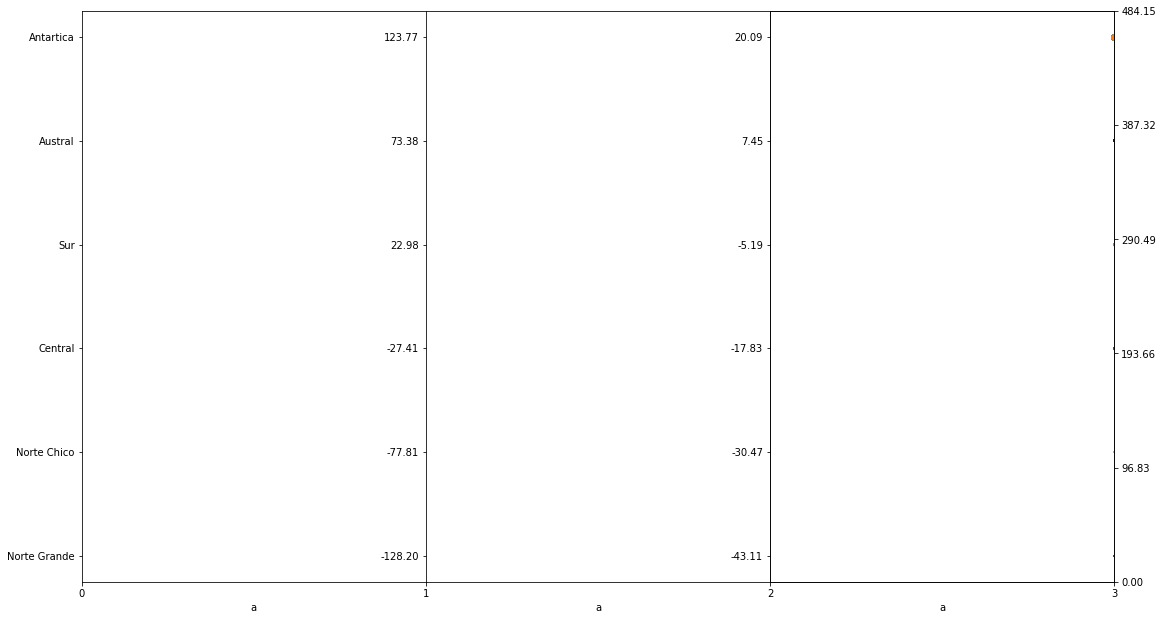

In [43]:
test1tas = tasAmon[['zona', 'longitud']]
test1tas['temp 2016'] = tasAmon['2016']
test1tas['prep 2016'] = prAmon['2016']
testdf = test1tas.interpolate().as_matrix()
parallel_coordinates(testdf, style=colorList(testdf)).show()

In [8]:
display(tasAmon['2016'])
display(prAmon['2016'])

COM00080002    28.627833
CO000080001    28.248250
VE000080405          NaN
COM00080035    29.968500
VEM00080403    30.316111
COM00080009    29.671333
VEM00080421          NaN
COM00080028    28.192500
VEM00080415    27.644091
VE000080423    27.997800
VEM00080407    29.991000
VEM00080476          NaN
VEM00080416     1.329000
VEM00080412          NaN
VEM00080420    28.125556
COM00080022    28.520917
COM00080036    30.451167
VEM00080479          NaN
VE000080413    27.855667
VEM00080472    27.613727
VEM00080419    28.305364
VEM00080410    25.948636
VE000002417    27.563333
VE000080425    30.680667
VEM00080435    28.687400
VEM00080427    27.995000
VEM00080432          NaN
VEM00080426    26.802778
VE000002589    32.582000
VEM00080428    26.678444
                 ...    
AYM00089648   -37.182167
AYM00089257          NaN
AYM00089865          NaN
AYM00089578   -43.727000
AYM00089666   -16.849583
AYM00089734          NaN
AYW00087602   -17.171167
AYM00089034   -12.539917
AYM00089664          NaN


COM00080002     99.633333
CO000080001    113.691667
COM00080035     78.600000
VEM00080403           NaN
COM00080009     16.500000
VEM00080421           NaN
COM00080028     36.450000
VEM00080415           NaN
VE000080423           NaN
VEM00080407           NaN
VEM00080476           NaN
VEM00080416           NaN
VEM00080420           NaN
COM00080022    162.050000
COM00080036     37.600000
VEM00080479           NaN
VE000080413           NaN
VEM00080472           NaN
VEM00080419           NaN
VEM00080410           NaN
VE000002417           NaN
VE000080425           NaN
VEM00080435     18.300000
VEM00080427           NaN
VEM00080432           NaN
VEM00080426           NaN
VE000002589           NaN
VEM00080428           NaN
VEM00080442           NaN
COM00080063    102.033333
                  ...    
AYM00089571      4.533333
AYM00089532           NaN
AYM00089573           NaN
AYM00089574     19.172727
AYM00089657           NaN
AYM00089001           NaN
AYM00089002           NaN
AYM00089512 

In [101]:
display(test1tas)
list(test1tas)

,zona,longitud,altura,temp 2018,prep 2018
COM00080002,0,-81.358,3,27.024,101.5
CO000080001,0,-81.717,6,26.977,32.6
VE000080405,0,-66.183,3,NaN,NaN
COM00080035,0,-72.926,13,29.543,NaN
VEM00080403,0,-69.681,16,NaN,NaN
COM00080009,0,-74.231,7,29.187,NaN
VEM00080421,0,-63.967,19,NaN,NaN
COM00080028,0,-74.781,30,27.800,NaN
VEM00080415,0,-66.991,72,26.077,NaN
VE000080423,0,-62.317,14,NaN,NaN


['zona', 'longitud', 'altura', 'temp 2018', 'prep 2018']

,zona,longitud,temp 2016,prep 2016
COM00080002,0,-81.358,28.627833,99.633333
CO000080001,0,-81.717,28.248250,113.691667
VE000080405,0,-66.183,NaN,NaN
COM00080035,0,-72.926,29.968500,78.600000
VEM00080403,0,-69.681,30.316111,NaN
COM00080009,0,-74.231,29.671333,16.500000
VEM00080421,0,-63.967,NaN,NaN
COM00080028,0,-74.781,28.192500,36.450000
VEM00080415,0,-66.991,27.644091,NaN
VE000080423,0,-62.317,27.997800,NaN


0
[0.0, 0.2756550357601476, 0.9536637606245103, 0.2057902165306895]
1
[0.0, 0.27463736687388557, 0.949373455301706, 0.2348273606664601]
2
[0.0, 0.31867209801370305, 0.959095164717584, 0.19858687046025678]
3
[0.0, 0.2995574982920738, 0.968816874133462, 0.16234638025405349]
4
[0.0, 0.3087562045202641, 0.9727458079651174, 0.0982133636269751]
5
[0.0, 0.2958581726748817, 0.9654580972331063, 0.034080346999896725]
6
[0.0, 0.32495386473224536, 0.9571007143287722, 0.054683465868016104]
7
[0.0, 0.29429906992434096, 0.9487433314244379, 0.07528658473613548]
8
[0.0, 0.3163816343365451, 0.9425448442012506, 0.10771455127543116]
9
[0.0, 0.3296311729838675, 0.9465427014889385, 0.1401425178147268]
10
[0.0, 0.30295350755597883, 0.9690711842184582, 0.17257048435402253]
11
[0.0, 0.30317461667332823, 0.8070926140816204, 0.20499845089331817]
12
[0.0, 0.3167983399807805, 0.6451140439447827, 0.2374264174326139]
13
[0.0, 0.3133144540163904, 0.7965503621877952, 0.26985438397190953]
14
[0.0, 0.3244918033716306, 0

198
[0.0, 0.3207924777544385, 0.9388026327687022, 0.31823814933388406]
199
[0.0, 0.31697125864947684, 0.9391699695581409, 0.22968088402354642]
200
[0.0, 0.3748451527495486, 0.9366406830831676, 0.23659530940332343]
201
[0.0, 0.38179024682013907, 0.9341113966081942, 0.24350973478310048]
202
[0.0, 0.31531577500162994, 0.9315821101332209, 0.2504241601628775]
203
[0.0, 0.3462625472337265, 0.9335501876243295, 0.3114147032354199]
204
[0.0, 0.31474032435006677, 0.9355182651154379, 0.3724052463079624]
205
[0.0, 0.3578849495559392, 0.935305869100006, 0.3580723211519452]
206
[0.0, 0.31233930611423405, 0.9350934730845741, 0.34373939599592807]
207
[0.0, 0.3955386983476345, 0.9348810770691424, 0.3294064708399109]
208
[0.0, 0.3222580343399467, 0.9346686810537104, 0.31507354568389373]
209
[0.0, 0.39044751918405063, 0.878609319428537, 0.1436280078488072]
210
[0.0, 0.31706480481450927, 0.9396889505093737, 0.3372663430754931]
211
[0.0, 0.32023120076424383, 0.9340037072759058, 0.5246996454266928]
212
[0.0

374
[0.0, 0.3396491168391601, 0.9023543462535415, 0.2965506557884953]
375
[0.0, 0.30673702472170017, 0.8391997332569775, 0.0006196426727253949]
376
[0.0, 0.31382612319179515, 0.8451866949986939, 0.0]
377
[0.0, 0.3067557339547066, 0.8511736567404103, 0.0011532238631278184]
378
[0.0, 0.3740429235160885, 0.8571606184821268, 0.19378750846271242]
379
[0.0, 0.3133566915272687, 0.8748568328410392, 0.0]
380
[0.0, 0.35221548500851835, 0.8925530471999518, 0.3498325489443944]
381
[0.0, 0.35783675910728613, 0.8968485329133764, 0.34823549372242957]
382
[0.0, 0.3444681617044678, 0.9011440186268008, 0.34663843850046466]
383
[0.0, 0.3524989582358894, 0.8862176649436373, 0.3114866260456469]
384
[0.0, 0.32797852406829436, 0.8712913112604739, 0.27633481359082923]
385
[0.0, 0.3122874305136251, 0.8563649575773102, 0.24118300113601154]
386
[0.0, 0.32174778253067887, 0.8414386038941467, 0.20603118868119383]
387
[0.0, 0.3463107376823796, 0.8923477153535476, 0.39568610672607357]
388
[0.0, 0.3345465987464814, 0

522
[0.4, 0.30737710726910394, 0.7384675085900295, 0.05098282212812834]
523
[0.4, 0.31111186703971744, 0.7688880181646472, 0.052511587005029114]
524
[0.4, 0.30442416665957983, 0.799308527739265, 0.0540403518819299]
525
[0.4, 0.3339739828271919, 0.8297290373138828, 0.264742331921925]
526
[0.4, 0.30699130020665194, 0.7828514685251453, 0.10669120201289982]
527
[0.4, 0.30346744451720253, 0.8030575607330159, 0.040328410616544456]
528
[0.4, 0.3401310213256909, 0.8284160437639401, 0.283324235405202]
529
[0.4, 0.305277704547194, 0.8069518016456688, 0.0]
530
[0.4, 0.3035028786706239, 0.7854875595273977, 0.06752383903060345]
531
[0.4, 0.3033636933159848, 0.8016436994119871, 0.0510860959069159]
532
[0.4, 0.3032684463115881, 0.776430524197305, 0.07982124247744407]
533
[0.4, 0.31233930611423405, 0.8184178898667792, 0.13879995869048847]
534
[0.4, 0.32412045344377444, 0.8150412170715534, 0.16427415745808804]
535
[0.4, 0.3044094260517565, 0.7800126715494203, 0.07664635615683844]
536
[0.4, 0.3034430658

699
[0.6, 0.3212715475086955, 0.7874363282898306, 0.05353712692347412]
700
[0.6, 0.3011455153118064, 0.722704992766291, 0.40386932424524075]
701
[0.6, 0.9953652127324835, 0.7664274896015432, 0.10020999001686806]
702
[0.6, 0.9233998644997974, 0.7533361715594671, 0.14482739196154457]
703
[0.6, 0.30273438275122105, 0.7402448535173911, 0.19219250232366003]
704
[0.6, 0.2994761414758183, 0.7440159424166617, 0.3504173199515552]
705
[0.8, 0.311018320874685, 0.7477870313159322, 0.33237257423976413]
706
[0.8, 0.005763010712453226, 0.7515581202152029, 0.3143278285279731]
707
[0.8, 0.30103269296731267, 0.7553292091144734, 0.29628308281618204]
708
[0.8, 0.3005958607239339, 0.7532890770992827, 0.29910151812454816]
709
[0.8, 0.29788387235767516, 0.7512489450840918, 0.32424524080002753]
710
[0.8, 0.3003004816210133, 0.7396599403219, 0.26909704292746733]
711
[0.8, 0.30019814778593235, 0.7233784435469287, 0.1484818754518228]
712
[0.8, 0.3033038804650095, 0.7070969467719573, 0.02786670797617818]
713
[0.8

878
[1.0, 0.0845232122052233, 0.050795849282657124, 0.03721298495645289]
879
[1.0, 0.011764138935898215, 0.10159169856531433, 0.03721298495645289]
880
[1.0, 0.11768957980763506, 0.15238754784797154, 0.03721298495645289]
881
[1.0, 0.46928992791275825, 0.20318339713062866, 0.03721298495645289]
882
[1.0, 0.1621948765048885, 0.27424397122408595, 0.03721298495645289]
883
[1.0, 1.0, 0.3453045453175433, 0.03721298495645289]
884
[1.0, 0.1779729963403606, 0.3768677662909156, 0.03721298495645289]
885
[1.0, 0.2571584076741872, 0.30213168364578935, 0.03721298495645289]
886
[1.0, 0.7604651228714704, 0.2273956010006631, 0.03721298495645289]
887
[1.0, 0.5034002613623156, 0.1526595183555368, 0.03721298495645289]
888
[1.0, 0.5062831840846791, 0.07792343571041052, 0.03721298495645289]
0
[0.0, 0.2756550357601476, 0.9536637606245103, 0.2057902165306895]
1
[0.0, 0.27463736687388557, 0.949373455301706, 0.2348273606664601]
2
[0.0, 0.31867209801370305, 0.959095164717584, 0.19858687046025678]
3
[0.0, 0.2995574

185
[0.0, 0.34612081062004096, 0.9414334149408974, 0.318012303140879]
186
[0.0, 0.3746580604194837, 0.9416986851911728, 0.31655186586509526]
187
[0.0, 0.3889734584017212, 0.9419639554414482, 0.3150914285893115]
188
[0.0, 0.3100375035079812, 0.9422292256917236, 0.31363099131352773]
189
[0.0, 0.33592144389923095, 0.9285143769968051, 0.45261454783297184]
190
[0.0, 0.3970978010981753, 0.9342815645909941, 0.44756101759096695]
191
[0.0, 0.32296955214064804, 0.940048752185183, 0.44250748734896206]
192
[0.0, 0.2959347104462719, 0.8491696304780275, 0.12260072881781031]
193
[0.0, 0.38320761295699424, 0.9762945325215505, 0.5837033977073222]
194
[0.0, 0.3228760059756156, 0.9471392941105553, 0.2629350407931426]
195
[0.0, 0.32452865489118876, 0.9428838386882875, 0.27601638610623425]
196
[0.0, 0.302355379046226, 0.7735867894387848, 0.172441392130538]
197
[0.0, 0.2902198901824717, 0.8588918108385074, 0.24533977073221105]
198
[0.0, 0.3207924777544385, 0.9388026327687022, 0.31823814933388406]
199
[0.0, 

381
[0.0, 0.35783675910728613, 0.8968485329133764, 0.34823549372242957]
382
[0.0, 0.3444681617044678, 0.9011440186268008, 0.34663843850046466]
383
[0.0, 0.3524989582358894, 0.8862176649436373, 0.3114866260456469]
384
[0.0, 0.32797852406829436, 0.8712913112604739, 0.27633481359082923]
385
[0.0, 0.3122874305136251, 0.8563649575773102, 0.24118300113601154]
386
[0.0, 0.32174778253067887, 0.8414386038941467, 0.20603118868119383]
387
[0.0, 0.3463107376823796, 0.8923477153535476, 0.39568610672607357]
388
[0.0, 0.3345465987464814, 0.8934718601181506, 0.30929611543057783]
389
[0.0, 0.3395073802254746, 0.8945960048827537, 0.2229061241350821]
390
[0.0, 0.36454657039915866, 0.8565827694556635, 0.2479514908307638]
391
[0.0, 0.32065641060530037, 0.8185695340285732, 0.2729968575264455]
392
[0.0, 0.34323221843313007, 0.8864627916088975, 0.29857924787182244]
393
[0.0, 0.3079559595993956, 0.8581590210380373, 0.0]
394
[0.0, 0.3064921038532516, 0.829855250467177, 0.004681744638369652]
395
[0.0, 0.36662442

546
[0.4, 0.3065740276159618, 0.82961601060944, 0.05039760404833213]
547
[0.4, 0.3056000136067149, 0.8020233663873653, 0.037626080071603146]
548
[0.4, 0.30562382535781407, 0.807302655374043, 0.05396915556473544]
549
[0.4, 0.3063305241136501, 0.813861029899331, 0.07031223105786773]
550
[0.4, 0.3059158027820062, 0.7972380982880222, 0.06455816034975385]
551
[0.4, 0.30494462350503304, 0.8010986666616432, 0.05880408964163998]
552
[0.4, 0.305916369728461, 0.8049592350352643, 0.04624944060036489]
553
[0.4, 0.30602522344777144, 0.8160480966302972, 0.047540362835209474]
554
[0.4, 0.3062990585854119, 0.8008196319850504, 0.06547557575131674]
555
[0.4, 0.3074644170231342, 0.8171350367713545, 0.08564838720782127]
556
[0.4, 0.3074715038538185, 0.7388244845982277, 0.016489380013081343]
557
[0.4, 0.30553679907701115, 0.7945898055392675, 0.03319782561753025]
558
[0.4, 0.3061108323624375, 0.7990398467083885, 0.04381155351928872]
559
[0.4, 0.30639373864335384, 0.8034898878775092, 0.05442528142104719]
560

703
[0.6, 0.30273438275122105, 0.7402448535173911, 0.19219250232366003]
704
[0.6, 0.2994761414758183, 0.7440159424166617, 0.3504173199515552]
705
[0.8, 0.311018320874685, 0.7477870313159322, 0.33237257423976413]
706
[0.8, 0.005763010712453226, 0.7515581202152029, 0.3143278285279731]
707
[0.8, 0.30103269296731267, 0.7553292091144734, 0.29628308281618204]
708
[0.8, 0.3005958607239339, 0.7532890770992827, 0.29910151812454816]
709
[0.8, 0.29788387235767516, 0.7512489450840918, 0.32424524080002753]
710
[0.8, 0.3003004816210133, 0.7396599403219, 0.26909704292746733]
711
[0.8, 0.30019814778593235, 0.7233784435469287, 0.1484818754518228]
712
[0.8, 0.3033038804650095, 0.7070969467719573, 0.02786670797617818]
713
[0.8, 0.3021013870345015, 0.7311245403580686, 0.079210988330063]
714
[0.8, 0.3018746084526047, 0.7288414009283259, 0.09086371303659334]
715
[0.8, 0.3018819787565163, 0.6771043688588824, 0.06971840682983922]
716
[0.8, 0.31493875560922646, 0.7824914099704623, 0.048573100623085126]
717
[0.

855
[1.0, 0.5062831840846791, 0.17139086894930364, 0.03171573358214004]
856
[1.0, 0.8560891466605437, 0.042095854180480924, 0.03221548370707757]
857
[1.0, 0.8559956004955112, 0.12760573648200596, 0.032715233832015106]
858
[1.0, 0.43196500806481325, 0.4140055157031768, 0.03321498395695263]
859
[1.0, 0.9197770766539953, 0.20983501868708168, 0.03371473408189017]
860
[1.0, 0.33860877009470836, 0.18517698726063445, 0.0342144842068277]
861
[1.0, 0.9836039085288588, 0.16051895583418713, 0.03471423433176523]
862
[1.0, 0.7246142638058549, 0.1358609244077399, 0.035213984456702756]
863
[1.0, 0.9682509985344434, 0.4396475073844113, 0.03571373458164029]
864
[1.0, 0.6188220553509824, 0.43783013216589295, 0.03621348470657783]
865
[1.0, 0.9702806668424201, 0.4360127569473746, 0.036713234831515354]
866
[1.0, 0.4081532569656459, 0.4883582494424016, 0.03721298495645289]
867
[1.0, 0.9789266002772368, 0.3666649869642533, 0.03721298495645289]
868
[1.0, 0.9905036468830702, 0.24497172448610513, 0.037212984956

167
[0.0, 0.3869409553614709, 0.9417801015230977, 0.25450101552549137]
168
[0.0, 0.34725470352952514, 0.9695509197862038, 0.3629040586595063]
169
[0.0, 0.29026241116657736, 0.9657991003702253, 0.36558272229680877]
170
[0.0, 0.3140883359271134, 0.9620472809542467, 0.3682613859341113]
171
[0.0, 0.4017751093497975, 0.9582954615382684, 0.37094004957141374]
172
[0.0, 0.39237513713017375, 0.9545436421222899, 0.37361871320871626]
173
[0.0, 0.3685633860310063, 0.9507918227063114, 0.3762973768460188]
174
[0.0, 0.3210362647299776, 0.947040003290333, 0.3789760404833213]
175
[0.0, 0.4012563533437085, 0.9432881838743544, 0.3816547041206238]
176
[0.0, 0.318859190343768, 0.939536364458376, 0.38433336775792626]
177
[0.0, 0.31131029829887713, 0.9393112529386943, 0.3296958013471491]
178
[0.0, 0.3970978010981753, 0.9395765231889697, 0.32823536407136533]
179
[0.0, 0.3915700731644399, 0.9398417934392451, 0.3267749267955815]
180
[0.0, 0.3894440239591571, 0.9401070636895205, 0.3253144895197978]
181
[0.0, 0.3

370
[0.0, 0.3065762954017808, 0.8253228796190246, 0.2215845476198672]
371
[0.0, 0.3745616795221775, 0.931145073542709, 0.11118815662861926]
372
[0.0, 0.3066015245190168, 0.8240315495207668, 0.000791765637371338]
373
[0.0, 0.37413646968112096, 0.8631929478871541, 0.14867121071293335]
374
[0.0, 0.3396491168391601, 0.9023543462535415, 0.2965506557884953]
375
[0.0, 0.30673702472170017, 0.8391997332569775, 0.0006196426727253949]
376
[0.0, 0.31382612319179515, 0.8451866949986939, 0.0]
377
[0.0, 0.3067557339547066, 0.8511736567404103, 0.0011532238631278184]
378
[0.0, 0.3740429235160885, 0.8571606184821268, 0.19378750846271242]
379
[0.0, 0.3133566915272687, 0.8748568328410392, 0.0]
380
[0.0, 0.35221548500851835, 0.8925530471999518, 0.3498325489443944]
381
[0.0, 0.35783675910728613, 0.8968485329133764, 0.34823549372242957]
382
[0.0, 0.3444681617044678, 0.9011440186268008, 0.34663843850046466]
383
[0.0, 0.3524989582358894, 0.8862176649436373, 0.3114866260456469]
384
[0.0, 0.32797852406829436, 0.

524
[0.4, 0.30442416665957983, 0.799308527739265, 0.0540403518819299]
525
[0.4, 0.3339739828271919, 0.8297290373138828, 0.264742331921925]
526
[0.4, 0.30699130020665194, 0.7828514685251453, 0.10669120201289982]
527
[0.4, 0.30346744451720253, 0.8030575607330159, 0.040328410616544456]
528
[0.4, 0.3401310213256909, 0.8284160437639401, 0.283324235405202]
529
[0.4, 0.305277704547194, 0.8069518016456688, 0.0]
530
[0.4, 0.3035028786706239, 0.7854875595273977, 0.06752383903060345]
531
[0.4, 0.3033636933159848, 0.8016436994119871, 0.0510860959069159]
532
[0.4, 0.3032684463115881, 0.776430524197305, 0.07982124247744407]
533
[0.4, 0.31233930611423405, 0.8184178898667792, 0.13879995869048847]
534
[0.4, 0.32412045344377444, 0.8150412170715534, 0.16427415745808804]
535
[0.4, 0.3044094260517565, 0.7800126715494203, 0.07664635615683844]
536
[0.4, 0.30344306581964864, 0.7449841260272871, 0.08203693445870457]
537
[0.4, 0.30753386796384014, 0.709955580505154, 0.03810802437261179]
538
[0.4, 0.352121938843

683
[0.6, 0.29873996150433574, 0.7626175477726205, 0.10024441460979723]
684
[0.6, 0.3276950508409233, 0.7922409051178492, 0.08195807084581226]
685
[0.6, 0.3045693049519938, 0.7338484839351378, 0.1425768283147195]
686
[0.6, 0.31144353071574155, 0.7405660377358491, 0.12713002168749354]
687
[0.6, 0.30235651293913546, 0.7479918922177345, 0.2824193603910634]
688
[0.6, 0.2990642548764482, 0.7523292920007234, 0.22415573685841164]
689
[0.6, 0.29907049128745034, 0.7490486919042739, 0.16589211332575993]
690
[0.6, 0.29952404845124403, 0.7547471215865935, 0.18078074976763397]
691
[0.6, 0.3012988743278141, 0.7620947992645729, 0.34744741643430066]
692
[0.6, 0.3009493518384656, 0.7336155681906255, 0.6790689868842301]
693
[0.6, 0.3035091150816261, 0.7676152118873953, 0.1377377141086735]
694
[0.6, 0.3218356592311639, 0.760170284149135, 0.1290959118336997]
695
[0.6, 0.30018709233006485, 0.7527253564108747, 0.1204541095587259]
696
[0.6, 0.3001958800001134, 0.7452804286726145, 0.11181230728375209]
697
[0.

832
[1.0, 0.7228085393475013, 0.5093783908011332, 0.03960079990235933]
833
[1.0, 0.9580913180654652, 0.49628730823135814, 0.03622468618854036]
834
[1.0, 0.7152029526571363, 0.4831962256615829, 0.032848572474721394]
835
[1.0, 0.4996215632414597, 0.4701051430918078, 0.029472458760902424]
836
[1.0, 0.48289664282656825, 0.45701406052203264, 0.02609634504708345]
837
[1.0, 0.5398265710794944, 0.5246774971366568, 0.022720231333264482]
838
[1.0, 0.5395912883007764, 0.49483147718367587, 0.02321998145820201]
839
[1.0, 0.7043374238520043, 0.36367189854723003, 0.023719731583139544]
840
[1.0, 0.4873386682994725, 0.4650088160829465, 0.024219481708077077]
841
[1.0, 0.3127191602389112, 0.5663457336186629, 0.024719231833014606]
842
[1.0, 0.9276661365717315, 0.3972577837723792, 0.02521898195795214]
843
[1.0, 0.49834593371828995, 0.44764508861293617, 0.02571873208288967]
844
[1.0, 0.9915893493439011, 0.5204783666887696, 0.026218482207827198]
845
[1.0, 0.513038351092931, 0.4369847866055819, 0.026718232332

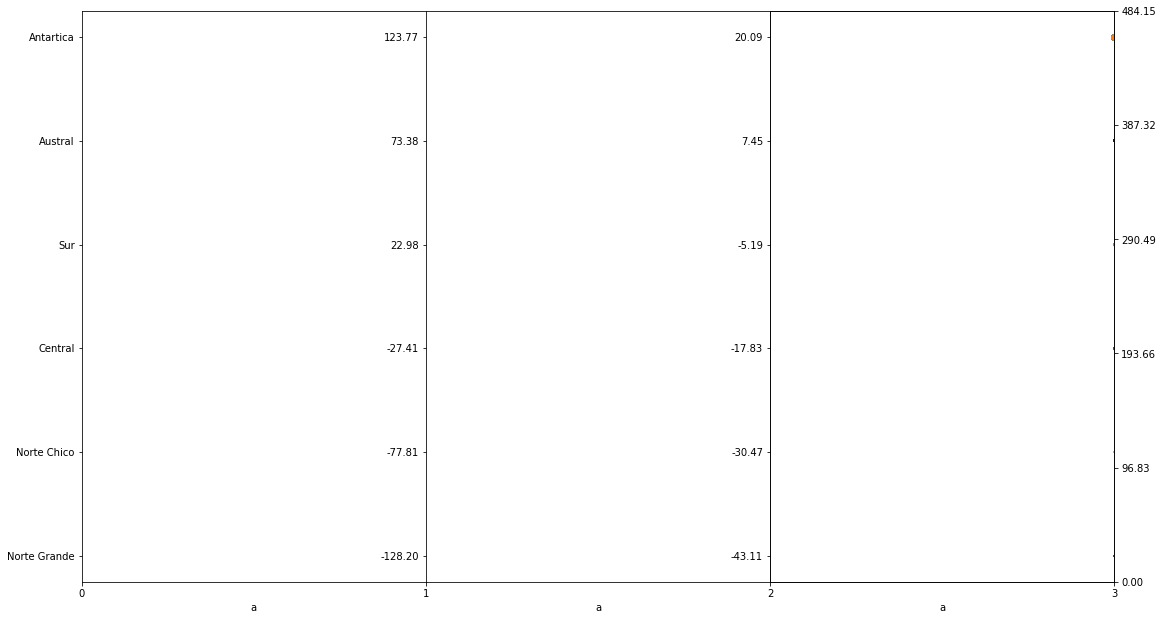

In [47]:
test2tas = test1tas
display(test2tas)
testdf2 = test2tas.interpolate().as_matrix()
parallel_coordinates(testdf2, style=colorList(testdf)).show()